In [40]:
using Interpolations
using DelimitedFiles
using Cubature
using Plots
using LaTeXStrings

In [2]:
kpk = readdlm("test_pk.txt", comments=true)
pk_itp = interpolate((kpk[:,1],), kpk[:,2], Gridded(Linear()));

In [3]:
b = 2
f = 0.7
pk2d = (μ, k) -> (b + μ^2*f)^2*pk_itp(k)

#1 (generic function with 1 method)

In [12]:
kp = (k, μ, αV, ϵ) -> k*sqrt(αV^2*ϵ*μ^2 + αV^2/ϵ^2*(1 - μ^2))
μp = (k, μ, αV, ϵ) -> μ*αV*sqrt(ϵ)/sqrt(αV^2*ϵ*μ^2 + αV^2/ϵ^2*(1 - μ^2))

#81 (generic function with 1 method)

In [13]:
L0 = x -> 1
L2 = x -> (3*x^2 - 1)/2
L4 = x -> (35*x^4 - 30*x^2 + 3)/8

#87 (generic function with 1 method)

In [27]:
function pkprime(kgrid, weight, αV, ϵ)
    Nk = size(kgrid)[1]
    pp = zeros(Nk)
    for i in 1:Nk
        pp[i] = hquadrature(x -> pk2d(μp(kgrid[i], x, αV, ϵ), kp(kgrid[i], x, αV, ϵ))*weight(μp(kgrid[i], x, αV, ϵ)), -1, 1, reltol=1e-4)[1]
    end
    return pp
end

pkprime (generic function with 1 method)

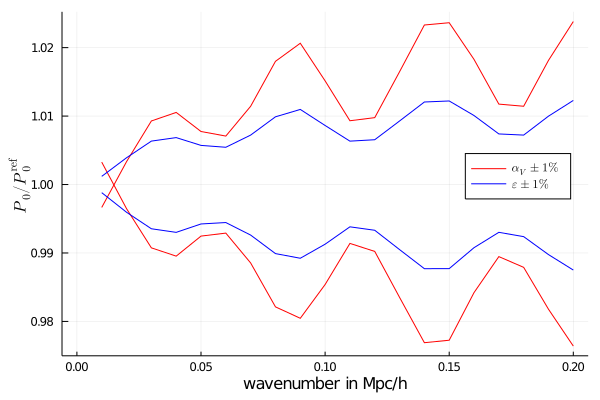

In [53]:
kgrid = collect(range(0.00, 0.20, step=0.01))
αV = 1.00
ϵ = 1.00
p0ref = pkprime(kgrid, L0, αV, ϵ)
p2ref = pkprime(kgrid, L2, αV, ϵ)
p4ref = pkprime(kgrid, L4, αV, ϵ)
αV = 1.01
ϵ = 1.00
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
plot(kgrid, p0./p0ref, color=:red, label=L"\alpha_V \pm 1\%")
αV = 0.99
ϵ = 1.00
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
plot!(kgrid, p0./p0ref, color=:red, label=:none)
αV = 1.00
ϵ = 1.01
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
plot!(kgrid, p0./p0ref, color=:blue, label=L"\epsilon \pm 1\%")
αV = 1.00
ϵ = 0.99
p0 = pkprime(kgrid, L0, αV, ϵ)
p2 = pkprime(kgrid, L2, αV, ϵ)
p4 = pkprime(kgrid, L4, αV, ϵ)
plot!(kgrid, p0./p0ref, color=:blue, label=:none, legend=:right)
plot!(xlabel="wavenumber in Mpc/h", ylabel=L"P_0/P^\mathrm{ref}_0")